In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pywt
import pywt.data

### CIFAR 10


In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
train_images.shape

(50000, 32, 32, 3)

In [16]:
train_images_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
test_images_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

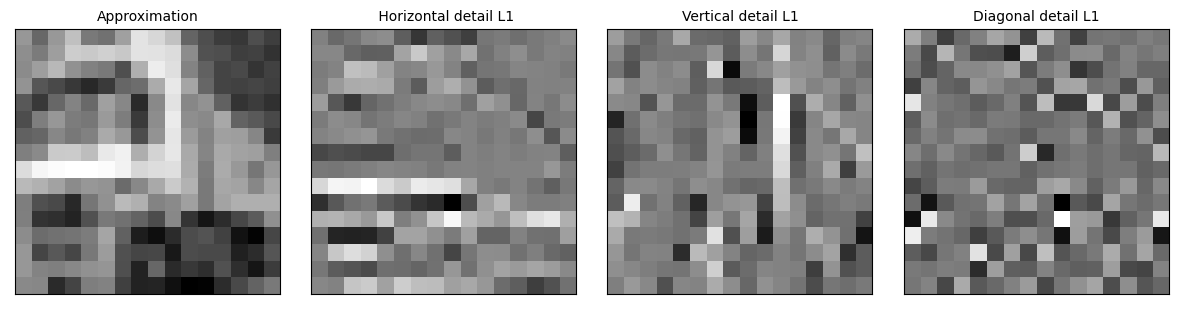

In [17]:
titles = [  'Approximation', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']

db1= pywt.dwt2(train_images_grayscale[1], 'db1')
LL, (LH, HL, HH) = db1
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()



In [50]:
len(train_images_grayscale)

50000

In [51]:
train_images_dwt2 = np.empty(shape=(50000,16,16))
test_images_dwt2 = np.empty(shape=(10000,16,16))

for i in range(len(train_images_grayscale)):
    db4 = pywt.dwt2(train_images_grayscale[i], 'db1')
    LL, (LH, HL, HH) = db4
    train_images_dwt2[i] = LL

for i in range(len(test_images_grayscale)):
    db4 = pywt.dwt2(test_images_grayscale[i], 'db1')
    LL, (LH, HL, HH) = db4
    test_images_dwt2[i] = LL

In [71]:
xTrain = np.reshape(train_images_dwt2, (train_images_dwt2.shape[0], -1))
xTest= np.reshape(test_images_dwt2, (test_images_dwt2.shape[0], -1))

xTrain_org = np.reshape(train_images_grayscale, (train_images_grayscale.shape[0], -1))
xTest_org = np.reshape(test_images_grayscale, (test_images_grayscale.shape[0], -1))
yTrain = train_labels.flatten()
yTest = test_labels.flatten()

In [8]:
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA, QDA
from sklearn.neighbors import NearestCentroid #NM
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM

In [10]:
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3, algorithm='brute'),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    KNeighborsClassifier(n_neighbors=21),
    SVC()  
]


In [75]:
def train_test(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

In [13]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = train_test(i,test_sample, xTest, yTest)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.26594999999999996
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.268125
Model:  NearestCentroid()
Średnia dokłądności:  0.2538250000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.25572500000000004
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.24102499999999996
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.25559999999999994
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.2579
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.259125


In [14]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = train_test(i,test_sample, xTest, yTest)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.27105000000000007
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.2699
Model:  NearestCentroid()
Średnia dokłądności:  0.250675
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.25329999999999997
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.24207499999999998
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.25112500000000004
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.2561
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.26209999999999994


In [15]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = train_test(i,test_sample, xTest_org, yTest)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.27054999999999996
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.21152500000000002
Model:  NearestCentroid()
Średnia dokłądności:  0.25272500000000003
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.242825
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.23325
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.24245
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.24907500000000002
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.2434


Model:  GaussianNB()
Model:  LinearDiscriminantAnalysis()
Model:  NearestCentroid()
Model:  KNeighborsClassifier(n_neighbors=1)
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Model:  KNeighborsClassifier()
Model:  KNeighborsClassifier(n_neighbors=7)
Model:  KNeighborsClassifier(n_neighbors=21)


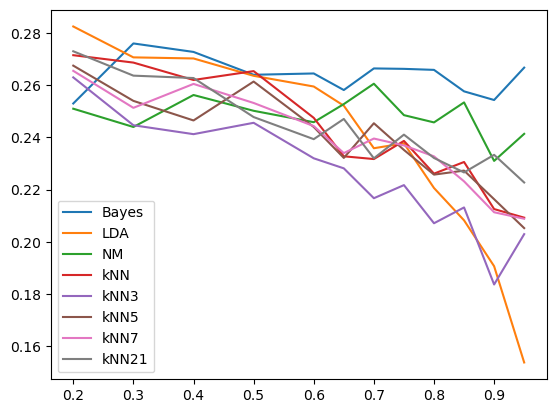

In [16]:
test_sample = [0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for i in classifiers:
    print('Model: ',i)
    accPoints = []
    acc = 0
    for j in test_sample:
        model = i
        predicted, X_test, y_test = train_test(i,j, xTest, yTest)
        acc = metrics.accuracy_score(y_test, predicted)
        # print('Dokładność dla próbki: ',j,'wynosi: ',acc)
        accPoints.append(acc)
    plt.plot(test_sample, accPoints)
    plt.grid()
    plt.legend(['Bayes','LDA','NM','kNN','kNN3','kNN5','kNN7','kNN21'])

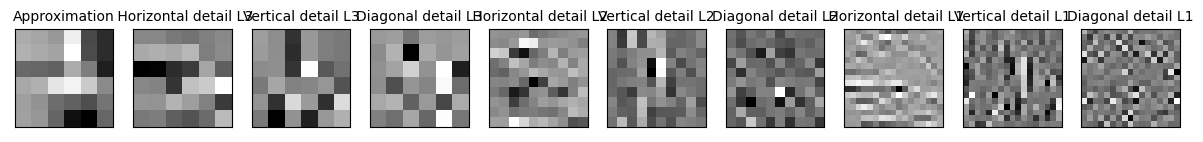

(6, 6)

In [17]:
titles = [  'Approximation', ' Horizontal detail L3',
            'Vertical detail L3', 'Diagonal detail L3',
            ' Horizontal detail L2','Vertical detail L2',
            'Diagonal detail L2', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']
db2 = pywt.wavedec2(train_images_grayscale[1], 'db2')
LL3,(LH3, HL3, HH3),(LH2, HL2, HH2) , (LH, HL, HH) = db2
fig = plt.figure(figsize=(12, 10))
for i, a in enumerate([LL3, LH3, HL3, HH3,LH2, HL2, HH2,LH, HL, HH]):
    ax = fig.add_subplot(1, 10, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

new_train_im = []

LH3.shape

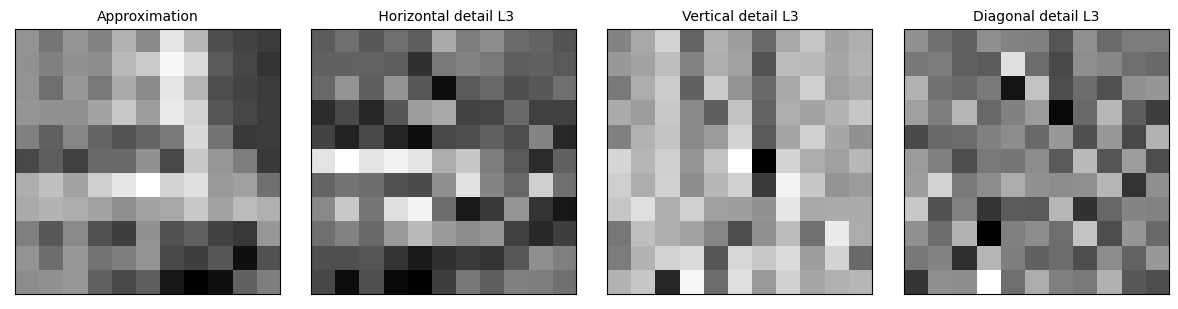

(11, 11)

In [18]:
titles = [  'Approximation', ' Horizontal detail L2',
            'Vertical detail L2','Diagonal detail L2', 
            ' Horizontal detail L1','Vertical detail L1',
            'Diagonal detail L1']
db3 = pywt.wavedec2(train_images_grayscale[1], 'db3')
LL2,(LH2, HL2, HH2) , (LH, HL, HH) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL2,LH2, HL2, HH2]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

new_train_im = []
LL2.shape

### Test

In [19]:
test_sample = 0.4
xTrain_orgrgb = np.reshape(train_images, (train_images.shape[0], -1))

xTrain_orgrgb.shape


(50000, 3072)

In [ ]:
for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted = train_test(i, xTrain_org, xTest_org)
      sumAcc += metrics.accuracy_score(yTest, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

### MNIST


In [2]:
from datasets import load_dataset

dataset = load_dataset("mnist")

Found cached dataset mnist (C:/Users/krojc/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [4]:
X_test_mnist = np.empty(shape=(10000,28,28))
y_test_mnist = np.empty(shape=(10000))
X_train_mnist = np.empty(shape=(60000,28,28))
y_train_mnist = np.empty(shape=(60000))

# X = np.array(dataset['train'][1]['image'])
for i in range(60000):
    X_train_mnist[i] = np.array(dataset['train'][i]['image'])
    y_train_mnist[i] = np.array(dataset['train'][i]['label'])
for i in range(10000):
    X_test_mnist[i] = np.array(dataset['test'][i]['image'])
    y_test_mnist[i] = np.array(dataset['test'][i]['label'])


In [5]:
xTrain_mnist = np.reshape(X_train_mnist, (X_train_mnist.shape[0], -1))
xTest_mnist = np.reshape(X_test_mnist, (X_test_mnist.shape[0], -1))

y_train_mnist = np.array(y_train_mnist, dtype=int)
y_test_mnist = np.array(y_test_mnist, dtype=int)

In [6]:
def fit_model(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

In [11]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.574025
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8546250000000001
Model:  NearestCentroid()
Średnia dokłądności:  0.8195249999999998
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9468499999999999
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9447750000000001
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9440750000000001
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9395249999999999
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9222000000000001
Model:  SVC()
Średnia dokłądności:  0.9592749999999999


Model:  GaussianNB()
Model:  LinearDiscriminantAnalysis()
Model:  NearestCentroid()
Model:  KNeighborsClassifier(n_neighbors=1)
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Model:  KNeighborsClassifier()
Model:  KNeighborsClassifier(n_neighbors=7)
Model:  KNeighborsClassifier(n_neighbors=21)
Model:  SVC()


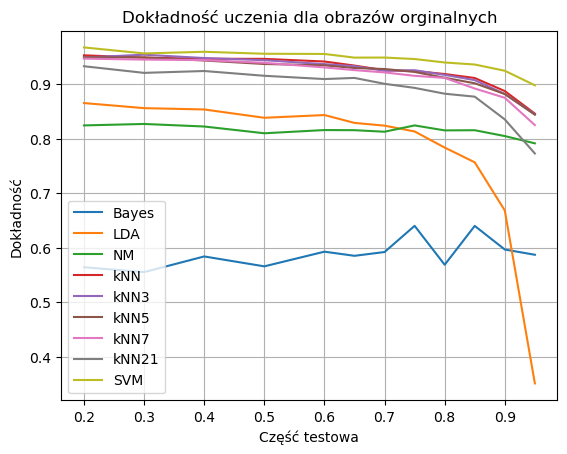

In [66]:
test_sample = [0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for i in classifiers:
  print('Model: ',i)
  accPoints = []
  acc = 0
  sumAcc = 0
  meanAcc = 0
  for j in test_sample:
      predicted, X_test, y_test = fit_model(i,j, xTest_mnist, y_test_mnist)
      acc = metrics.accuracy_score(y_test, predicted)
      # print('Dokładność dla próbki: ',j,'wynosi: ',acc)
      accPoints.append(acc)
  plt.plot(test_sample, accPoints)
  plt.grid()
  plt.xlabel('Część testowa')
  plt.ylabel('Dokładność')
  plt.title('Dokładność uczenia dla obrazów orginalnych')
  plt.legend(['Bayes','LDA','NM','kNN','kNN3','kNN5','kNN7','kNN21','SVM'])

### Haar

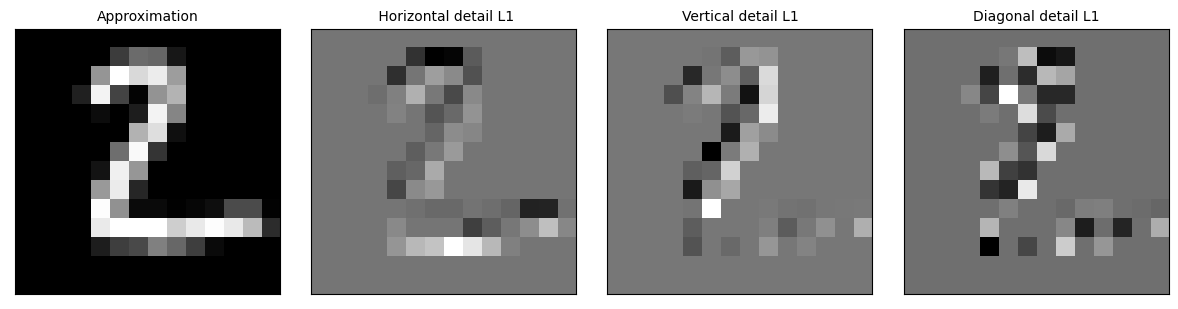

(14, 14)

In [12]:
titles = [  'Approximation', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']
haar= pywt.dwt2(X_test_mnist[1], 'db1')

LL,((LH, HL, HH)) = haar
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

LL.shape

In [13]:
train_images_haar = np.empty(shape=(60000,14,14))
test_images_haar = np.empty(shape=(10000,14,14))

for i in range(len(X_train_mnist)):
    db_haar_mnist_train = pywt.dwt2(X_train_mnist[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_train
    train_images_haar[i] = LL

for i in range(len(X_test_mnist)):
    db_haar_mnist_test = pywt.dwt2(X_test_mnist[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_test
    test_images_haar[i] = LL

In [14]:
xTrain_mnist_haar = np.reshape(train_images_haar, (train_images_haar.shape[0], -1))
xTest_mnist_haar = np.reshape(test_images_haar, (test_images_haar.shape[0], -1))

In [62]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_haar, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5797999999999999
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8731500000000001
Model:  NearestCentroid()
Średnia dokłądności:  0.819125
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9540499999999998
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9514249999999999
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9514750000000001
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.948175
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9334999999999999
Model:  SVC()
Średnia dokłądności:  0.9610000000000001


Model:  GaussianNB()
Model:  LinearDiscriminantAnalysis()
Model:  NearestCentroid()
Model:  KNeighborsClassifier(n_neighbors=1)
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Model:  KNeighborsClassifier()
Model:  KNeighborsClassifier(n_neighbors=7)
Model:  KNeighborsClassifier(n_neighbors=21)
Model:  SVC()


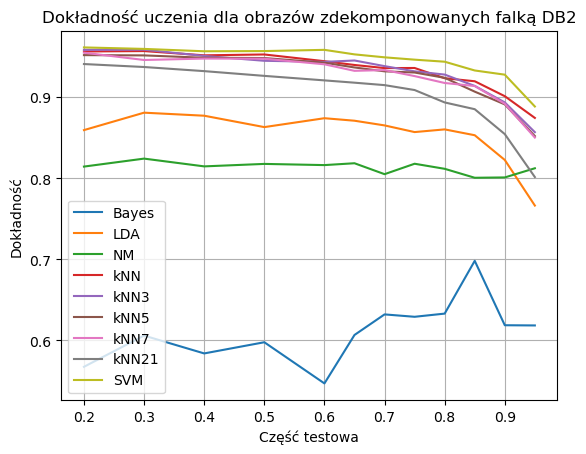

In [64]:
test_sample = [0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for i in classifiers:
  print('Model: ',i)
  accPoints = []
  acc = 0
  sumAcc = 0
  meanAcc = 0
  for j in test_sample:
      predicted, X_test, y_test = fit_model(i,j, xTest_mnist_haar, y_test_mnist)
      acc = metrics.accuracy_score(y_test, predicted)
      # print('Dokładność dla próbki: ',j,'wynosi: ',acc)
      accPoints.append(acc)
  plt.plot(test_sample, accPoints)
  plt.grid()
  plt.xlabel('Część testowa')
  plt.ylabel('Dokładność')
  plt.title('Dokładność uczenia dla obrazów zdekomponowanych falką DB2')
  plt.legend(['Bayes','LDA','NM','kNN','kNN3','kNN5','kNN7','kNN21','SVM'])

In [16]:
train_images_haar_2 = np.empty(shape=(60000,7,7))
test_images_haar_2 = np.empty(shape=(10000,7,7))

for i in range(len(train_images_haar)):
    db_haar_mnist_train = pywt.dwt2(train_images_haar[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_train
    train_images_haar_2[i] = LL

for i in range(len(test_images_haar)):
    db_haar_mnist_test = pywt.dwt2(test_images_haar[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_test
    test_images_haar_2[i] = LL

In [17]:
xTrain_mnist_haar_2 = np.reshape(train_images_haar_2, (train_images_haar_2.shape[0], -1))
xTest_mnist_haar_2 = np.reshape(test_images_haar_2, (test_images_haar_2.shape[0], -1))

In [18]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_haar_2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.47974999999999995
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.849775
Model:  NearestCentroid()
Średnia dokłądności:  0.7804
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.927875
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.930375
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.93065
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9302249999999999
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9152250000000001
Model:  SVC()
Średnia dokłądności:  0.9445999999999998


In [19]:
train_images_haar_3 = np.empty(shape=(60000,4,4))
test_images_haar_3 = np.empty(shape=(10000,4,4))

for i in range(len(train_images_haar_2)):
    db_haar_mnist_train = pywt.dwt2(train_images_haar_2[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_train
    train_images_haar_3[i] = LL

for i in range(len(test_images_haar_2)):
    db_haar_mnist_test = pywt.dwt2(test_images_haar_2[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_test
    test_images_haar_3[i] = LL

In [20]:
xTrain_mnist_haar_3 = np.reshape(train_images_haar_3, (train_images_haar_3.shape[0], -1))
xTest_mnist_haar_3 = np.reshape(test_images_haar_3, (test_images_haar_3.shape[0], -1))

In [21]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_haar_3, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.38482500000000003
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.673375
Model:  NearestCentroid()
Średnia dokłądności:  0.54215
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.69905
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.7239749999999999
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.7339
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.742025
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.736575
Model:  SVC()
Średnia dokłądności:  0.771125


### DB2

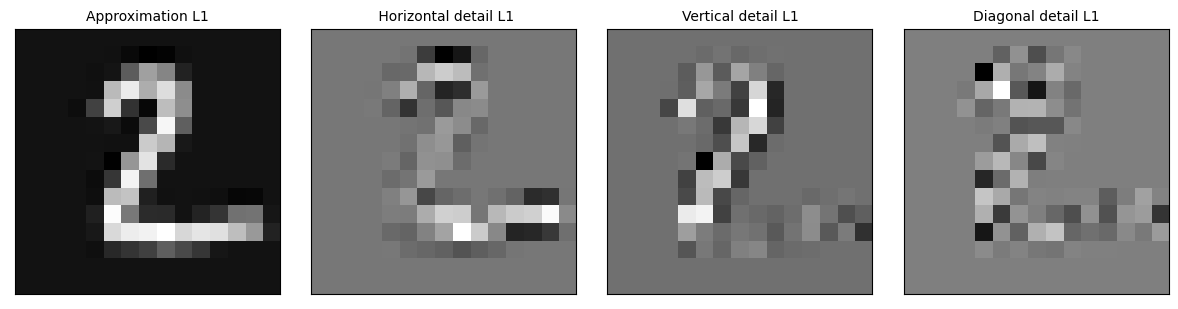

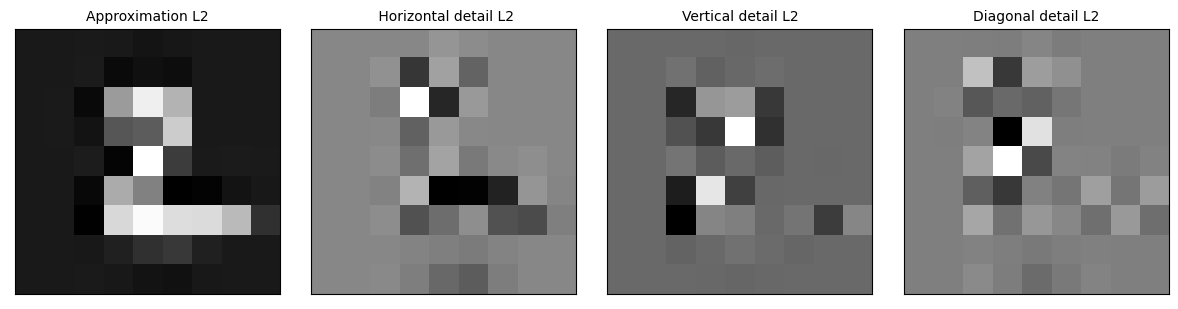

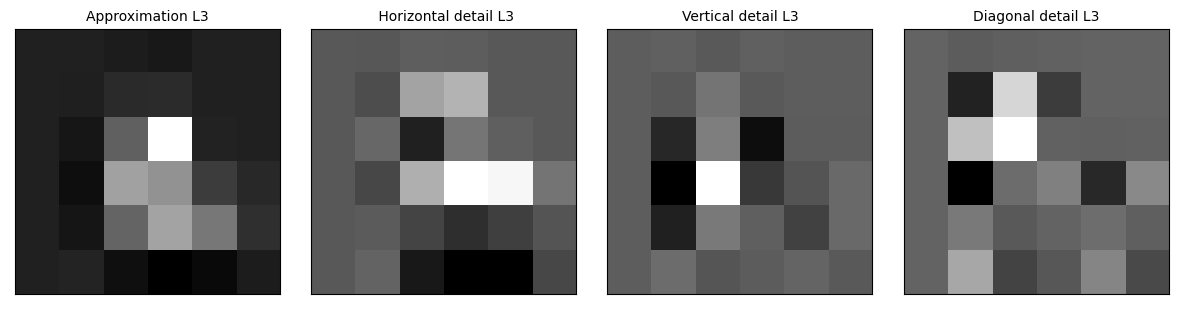

(15, 15) (9, 9) (6, 6)


In [22]:
titles = [  'Approximation L1', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']
db2= pywt.dwt2(X_test_mnist[1], 'db2')

LL,((LH, HL, HH)) = db2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


titles = [  'Approximation L2', ' Horizontal detail L2',
            'Vertical detail L2','Diagonal detail L2']
db2= pywt.dwt2(LL, 'db2')

LL1,((LH1, HL1, HH1)) = db2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL1,LH1, HL1, HH1]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()
titles = [  'Approximation L3', ' Horizontal detail L3',
            'Vertical detail L3','Diagonal detail L3']
db2= pywt.dwt2(LL1, 'db2')

LL2,((LH2, HL2, HH2)) = db2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL2,LH2, HL2, HH2]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

print(LL.shape,LL1.shape,LL2.shape)



In [23]:
train_images_db2 = np.empty(shape=(60000,15,15))
test_images_db2 = np.empty(shape=(10000,15,15))

for i in range(len(X_train_mnist)):
    db_2_mnist_train = pywt.dwt2(X_train_mnist[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db2[i] = LL

for i in range(len(X_test_mnist)):
    db_2_mnist_test = pywt.dwt2(X_test_mnist[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db2[i] = LL

In [24]:
xTrain_mnist_db2 = np.reshape(train_images_db2, (train_images_db2.shape[0], -1))
xTest_mnist_db2 = np.reshape(test_images_db2, (test_images_db2.shape[0], -1))

In [25]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.6068749999999999
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.871725
Model:  NearestCentroid()
Średnia dokłądności:  0.8189500000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9542249999999998
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9524249999999999
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9494499999999999
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9483750000000001
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9322750000000001
Model:  SVC()
Średnia dokłądności:  0.9605749999999998


### DB2 L2

In [26]:
train_images_db2_2 = np.empty(shape=(60000,9,9))
test_images_db2_2 = np.empty(shape=(10000,9,9))

for i in range(len(train_images_db2)):
    db_2_mnist_train = pywt.dwt2(train_images_db2[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db2_2[i] = LL

for i in range(len(test_images_db2)):
    db_2_mnist_test = pywt.dwt2(test_images_db2[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db2_2[i] = LL

In [27]:
xTrain_mnist_db2_2 = np.reshape(train_images_db2_2, (train_images_db2_2.shape[0], -1))
xTest_mnist_db2_2 = np.reshape(test_images_db2_2, (test_images_db2_2.shape[0], -1))

In [28]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db2_2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5526749999999999
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8474999999999999
Model:  NearestCentroid()
Średnia dokłądności:  0.77855
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.927675
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9299
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9325249999999998
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9290499999999999
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9134
Model:  SVC()
Średnia dokłądności:  0.9432749999999999


### DB2 L3

In [29]:
train_images_db2_3 = np.empty(shape=(60000,6,6))
test_images_db2_3 = np.empty(shape=(10000,6,6))

for i in range(len(train_images_db2_2)):
    db_2_mnist_train = pywt.dwt2(train_images_db2_2[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db2_3[i] = LL

for i in range(len(test_images_db2_2)):
    db_2_mnist_test = pywt.dwt2(test_images_db2_2[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db2_3[i] = LL

In [30]:
xTrain_mnist_db2_3 = np.reshape(train_images_db2_3, (train_images_db2_3.shape[0], -1))
xTest_mnist_db2_3 = np.reshape(test_images_db2_3, (test_images_db2_3.shape[0], -1))

In [31]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db2_3, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.62505
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.76475
Model:  NearestCentroid()
Średnia dokłądności:  0.5944999999999999
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.7731250000000001
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.789675
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.799075
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.804775
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.7890499999999999
Model:  SVC()
Średnia dokłądności:  0.825325


### DB3

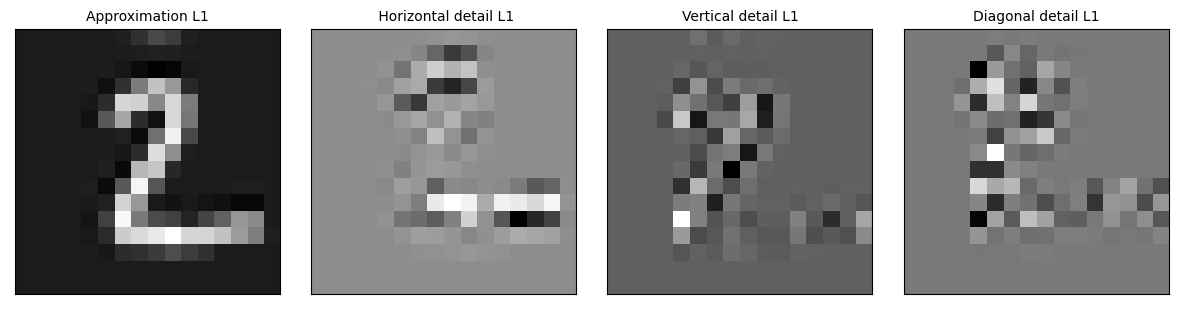

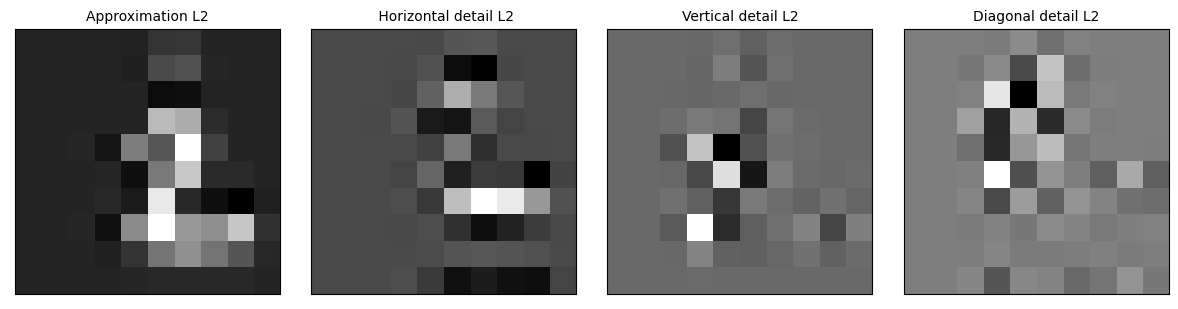

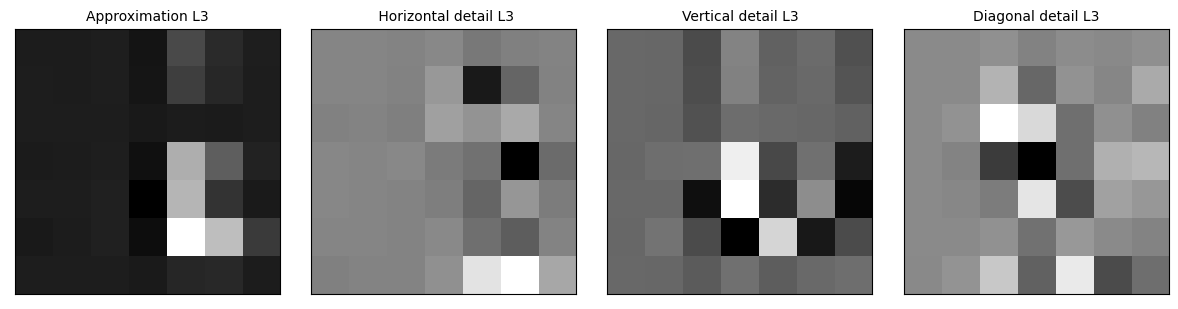

(16, 16) (10, 10) (7, 7)


In [32]:
titles = [  'Approximation L1', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']

db3= pywt.dwt2(X_test_mnist[1], 'db3')

LL,((LH, HL, HH)) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

titles = [  'Approximation L2', ' Horizontal detail L2',
            'Vertical detail L2','Diagonal detail L2']
db3= pywt.dwt2(LL, 'db3')

LL1,((LH1, HL1, HH1)) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL1,LH1, HL1, HH1]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

titles = [  'Approximation L3', ' Horizontal detail L3',
            'Vertical detail L3','Diagonal detail L3']

db3= pywt.dwt2(LL1, 'db3')

LL2,((LH2, HL2, HH2)) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL2,LH2, HL2, HH2]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

print(LL.shape,LL1.shape,LL2.shape)

### L1

In [33]:
train_images_db3 = np.empty(shape=(60000,16,16))
test_images_db3 = np.empty(shape=(10000,16,16))

for i in range(len(X_train_mnist)):
    db_2_mnist_train = pywt.dwt2(X_train_mnist[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db3[i] = LL

for i in range(len(X_test_mnist)):
    db_2_mnist_test = pywt.dwt2(X_test_mnist[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db3[i] = LL

In [34]:
xTrain_mnist_db3 = np.reshape(train_images_db3, (train_images_db3.shape[0], -1))
xTest_mnist_db3 = np.reshape(test_images_db3, (test_images_db3.shape[0], -1))

In [35]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db3, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5335500000000001
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.865225
Model:  NearestCentroid()
Średnia dokłądności:  0.820875
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9534999999999998
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9511749999999999
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9497500000000001
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.94475
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9309749999999999
Model:  SVC()
Średnia dokłądności:  0.96085


### L2

In [36]:
train_images_db3_2 = np.empty(shape=(60000,10,10))
test_images_db3_2 = np.empty(shape=(10000,10,10))

for i in range(len(train_images_db3)):
    db_2_mnist_train = pywt.dwt2(train_images_db3[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db3_2[i] = LL

for i in range(len(test_images_db3)):
    db_2_mnist_test = pywt.dwt2(test_images_db3[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db3_2[i] = LL

In [37]:
xTrain_mnist_db3_2 = np.reshape(train_images_db3_2, (train_images_db3_2.shape[0], -1))
xTest_mnist_db3_2 = np.reshape(test_images_db3_2, (test_images_db3_2.shape[0], -1))

In [38]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db3_2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.576425
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8543000000000001
Model:  NearestCentroid()
Średnia dokłądności:  0.7959
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9343749999999998
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9369250000000001
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.939675
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9355749999999998
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.921275
Model:  SVC()
Średnia dokłądności:  0.9408000000000001


### L3

In [39]:
train_images_db3_3 = np.empty(shape=(60000,7,7))
test_images_db3_3 = np.empty(shape=(10000,7,7))

for i in range(len(train_images_db3_2)):
    db_2_mnist_train = pywt.dwt2(train_images_db3_2[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db3_3[i] = LL

for i in range(len(test_images_db3_2)):
    db_2_mnist_test = pywt.dwt2(test_images_db3_2[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db3_3[i] = LL

In [40]:
xTrain_mnist_db3_2 = np.reshape(train_images_db3_3, (train_images_db3_3.shape[0], -1))
xTest_mnist_db3_2 = np.reshape(test_images_db3_3, (test_images_db3_3.shape[0], -1))

In [41]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db3_2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5551
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.790025
Model:  NearestCentroid()
Średnia dokłądności:  0.5545500000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.736375
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.7510499999999999
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.7592000000000001
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.7623249999999999
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.7505499999999999
Model:  SVC()
Średnia dokłądności:  0.7967500000000001


### Haar with whole decomposition

In [42]:
images_haar_full = np.empty(shape=(10000,56,14))
images_haar_LL = np.empty(shape=(10000,14,14))
images_haar_details = np.empty(shape=(10000,588))


for i in range(len(X_test_mnist)):
    db_2_mnist_test = pywt.dwt2(X_test_mnist[i], 'db1')
    LL, (LH, HL, HH) = db_2_mnist_test
    images_haar_full[i] = np.concatenate((LL,LH,HL,HH))
    images_haar_LL[i] = LL
    images_haar_details[i] = np.concatenate((LH,HL,HH), axis=None)

In [43]:
Data_mnist_haar_full = np.reshape(images_haar_full, (images_haar_full.shape[0], -1))


In [44]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, Data_mnist_haar_full, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5729
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8531000000000001
Model:  NearestCentroid()
Średnia dokłądności:  0.8185500000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9481999999999999
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9448000000000001
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9434750000000001
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9398500000000001
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9197750000000001
Model:  SVC()
Średnia dokłądności:  0.9591


In [45]:
images_haar_details[1].shape

(588,)

In [46]:
images_haar_full_2 = np.empty(shape=(10000,196))
images_haar_full = np.empty(shape=(10000,784))
images_haar_LL_2 = np.empty(shape=(10000,7,7))
images_haar_details_2 = np.empty(shape=(10000,147))

for i in range(len(images_haar_LL)):
    db_2_mnist_test = pywt.dwt2(images_haar_LL[i], 'db1')
    LL2, (LH2, HL2, HH2) = db_2_mnist_test
    images_haar_full_2[i] = np.concatenate((LL2,LH2,HL2,HH2), axis=None)
    images_haar_full[i] = np.concatenate((images_haar_full_2[i],images_haar_details[i]), axis=0)
    images_haar_LL_2[i] = LL2
    images_haar_details_2[i] = np.concatenate((LH2,HL2,HH2), axis=None)

In [47]:
images_haar_full_L2 = np.reshape(images_haar_full_2, (images_haar_full_2.shape[0], -1))
images_haar_details_L1 = np.reshape(images_haar_details, (images_haar_details.shape[0], -1))

print(images_haar_full_L2.shape, images_haar_details_L1.shape)

(10000, 196) (10000, 588)


In [48]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5439499999999999
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8525750000000001
Model:  NearestCentroid()
Średnia dokłądności:  0.8156249999999998
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.94765
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9436750000000002
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9465000000000001
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9412249999999999
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9228
Model:  SVC()
Średnia dokłądności:  0.9575250000000001


In [49]:
images_haar_full_3 = np.empty(shape=(10000,196))
images_haar_full_L2 = np.empty(shape=(10000,343))
images_haar_full = np.empty(shape=(10000, 931))
images_haar_LL_3 = np.empty(shape=(10000,7,7))
images_haar_details_3 = np.empty(shape=(10000,21,7))

for i in range(len(images_haar_LL)):
    db_3_mnist_test = pywt.dwt2(images_haar_LL[i], 'db1')
    LL3, (LH3, HL3, HH3) = db_3_mnist_test
    images_haar_full_3[i] = np.concatenate((LL3,LH3,HL3,HH3), axis=None)
    images_haar_full_L2[i] = np.concatenate((images_haar_full_3[i],images_haar_details_2[i]), axis=0)
    images_haar_full[i] = np.concatenate((images_haar_full_L2[i],images_haar_details[i]), axis=0)
    images_haar_LL_2[i] = LL2
    images_haar_details_3[i] = np.concatenate((LH2,HL2,HH2))

In [50]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.530375
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.853125
Model:  NearestCentroid()
Średnia dokłądności:  0.8119
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.945725
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9417249999999999
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9416749999999998
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9388500000000001
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.919575
Model:  SVC()
Średnia dokłądności:  0.9585750000000001


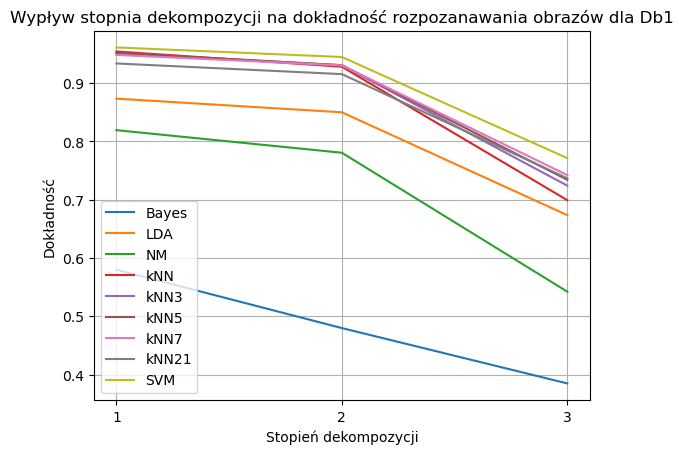

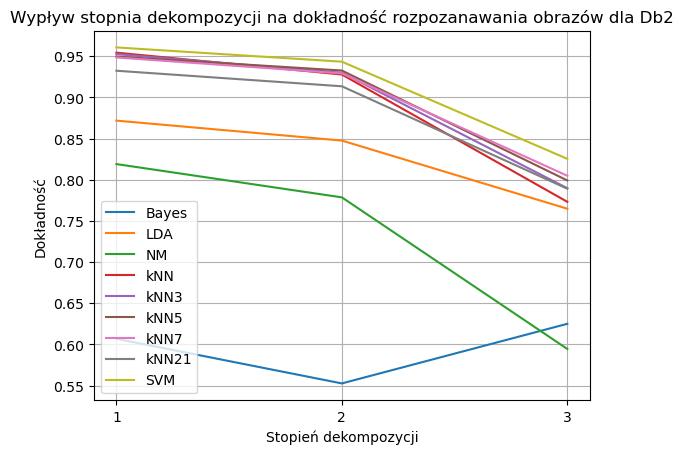

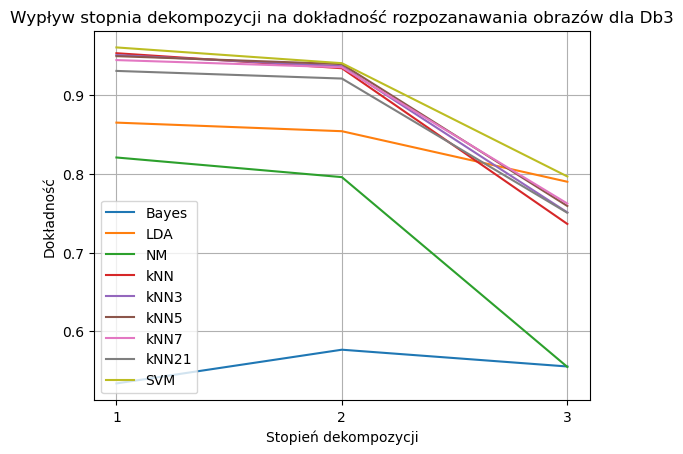

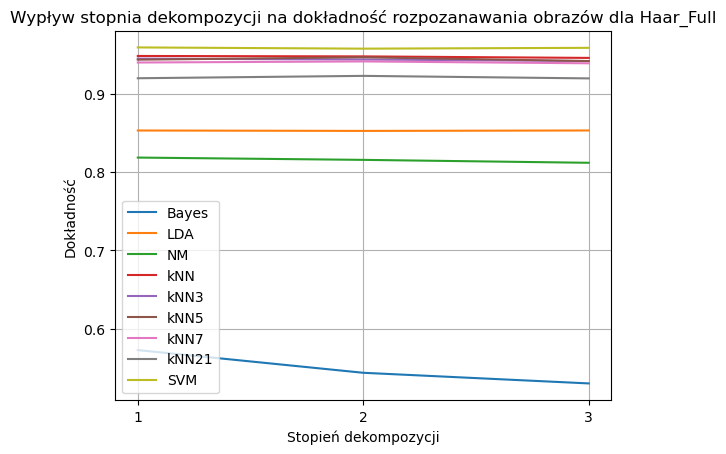

In [88]:
Db3 = [[0.5335500000000001, 0.576425, 0.5551], 
 [0.865225, 0.8543000000000001, 0.790025], 
 [0.820875, 0.7959, 0.5545500000000001], 
 [0.9534999999999998, 0.9343749999999998, 0.736375], 
 [0.9511749999999999, 0.9369250000000001, 0.7510499999999999], 
 [0.9497500000000001, 0.939675, 0.7592000000000001], 
 [0.94475, 0.9355749999999998, 0.7623249999999999], 
 [0.9309749999999999, 0.921275, 0.7505499999999999], 
 [0.96085, 0.9408000000000001, 0.7967500000000001]]

Haar_Full = [[0.5729, 0.5439499999999999, 0.530375], 
 [0.8531000000000001, 0.8525750000000001, 0.853125], 
 [0.8185500000000001, 0.8156249999999998, 0.8119], 
 [0.9481999999999999, 0.94765, 0.945725], 
 [0.9448000000000001, 0.9436750000000002, 0.9417249999999999], 
 [0.9434750000000001, 0.9465000000000001, 0.9416749999999998], 
 [0.9398500000000001, 0.9412249999999999, 0.9388500000000001], 
 [0.9197750000000001, 0.9228, 0.919575], 
 [0.9591, 0.9575250000000001, 0.9585750000000001]]


Db2 = [[0.6068749999999999, 0.5526749999999999, 0.62505],
[0.871725, 0.8474999999999999, 0.76475],
[0.8189500000000001, 0.77855, 0.5944999999999999],
[0.9542249999999998, 0.927675, 0.7731250000000001],
[0.9524249999999999, 0.9299, 0.789675],
[0.9494499999999999, 0.9325249999999998, 0.799075],
[0.9483750000000001, 0.9290499999999999, 0.804775],
[0.9322750000000001, 0.9134, 0.7890499999999999],
[0.9605749999999998, 0.9432749999999999, 0.825325]]


Db1=[[0.57979, 0.47974999999999995, 0.38482500000000003],
[0.8731500000000001, 0.849775, 0.673375],
[0.819125, 0.7804, 0.54215],
[0.9540499999999998, 0.927875, 0.69905],
[0.9514249999999999, 0.930375, 0.7239749999999999],
[0.9514750000000001, 0.93065, 0.7339],
[0.948175, 0.9302249999999999, 0.742025],
[0.9334999999999999, 0.9152250000000001, 0.736575],
[0.9610000000000001, 0.9445999999999998, 0.771125]]

names = [Db1, Db2, Db3, Haar_Full]

namesf = ['Db1', 'Db2', 'Db3', 'Haar_Full']

test_sample = [1,2,3]
for j in range(len(names)):
    for i in range(9):
        plt.plot(test_sample, names[j][i])
        plt.grid()
        plt.xlabel('Stopień dekompozycji')
        plt.ylabel('Dokładność')
        plt.xticks(test_sample)
        plt.title(f'Wypływ stopnia dekompozycji na dokładność rozpozanawania obrazów dla {namesf[j]}')
        plt.legend(['Bayes','LDA','NM','kNN','kNN3','kNN5','kNN7','kNN21','SVM'])
    plt.show()